In [ ]:
# import pymongo
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


## MongoDB Query and Usage

In [16]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
mycol = mydb["tweets"]
mydb.mycol.remove({})
myquery = { "username": "Google" }

mydoc = mycol.find(myquery)

sent_score_list = []
for j in mydoc:
    sent_score_list.append(j['score'])
    #print(j['score'])



/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: remove is deprecated. Use delete_one or delete_many instead.
  """


In [17]:
### Delete all tweets relating to username!
#myquery = { "username": "Google" }
#mycol.delete_many(myquery)

[Text(0, 0.5, 'Score Frequency Percentage'), Text(0.5, 0, 'Sentiment Score')]

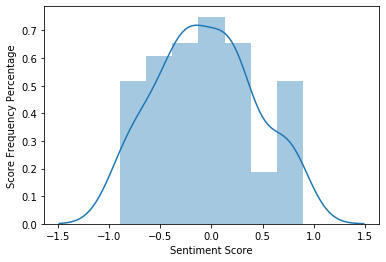

In [22]:
x = np.array(sent_score_list)
g = sns.distplot(x);
g.set(xlabel='Sentiment Score', ylabel='Score Frequency Percentage')

## MySQL Query and Usage

In [46]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
  database="mydatabase"
)

mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM tweets")
myresult = mycursor.fetchall()
mydb.close()

sent_score_list = []
for j in myresult:
    sent_score_list.append(float(j[3]))
    print(j)

('Google', 'Pixel 4', 'RT Kissimmee Prairie stars for as far as the eye can see Pic is mine taken with a pixel 4 smartphone', Decimal('0.300'))
('Google', 'Pixel 4', 'RT SOOC portrait mode on Pixel 4 XL AFRICAN U21 soccer players randomly approached on the street', Decimal('-0.400'))
('Google', 'Pixel 4', 'i love how he does the work pixel 4 XL officially masuk wishlist huehue', Decimal('0.100'))
('Google', 'Pixel 4', 'Kissimmee Prairie stars for as far as the eye can see Pic is mine taken with a pixel 4 smartphone', Decimal('0.400'))
('Google', 'Pixel 4', 'What a beauty clicked by my Pixel 4 XL GooglePixel Pixel4XL', Decimal('0.200'))
('Google', 'Pixel 4', 'The easiest instances and covers on your Google Pixel 4 and 4 XL Video Google', Decimal('0.400'))
('Google', 'Pixel 4', 'This week s best tales Recorder on older Pixels December 2019 patch Pixel 4 pizza containers extra Google', Decimal('-0.100'))
('Google', 'Pixel 4', 'Pixel 4 s spectacular recorder app is now to be had for older 

[Text(0, 0.5, 'Score Frequency Percentage'), Text(0.5, 0, 'Sentiment Score')]

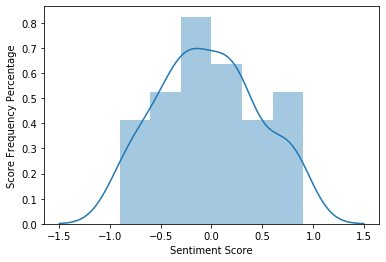

In [48]:
x = np.array(sent_score_list)
g = sns.distplot(x);
g.set(xlabel='Sentiment Score', ylabel='Score Frequency Percentage')